## 셀프 주유소는 정말 저렴할까?

- 오피넷 검색

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 서울시 구별 주유소 가격 정보 얻기

In [2]:
driver=webdriver.Chrome()
driver.get('https://www.opinet.co.kr/searRgSelect.do')

In [25]:
driver.close()

In [5]:
driver.find_element_by_css_selector('.m1').click()

- 서울 자치구 리스트 가져오기

In [6]:
region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = region.find_elements_by_css_selector('option')
gu_list[0]

<selenium.webdriver.remote.webelement.WebElement (session="f2f31cbb08d19f7c210aaf0c9811eb1b", element="235c0d3b-e900-4786-b8a6-1ba37f402d5a")>

In [7]:
gu_list[0].text

'시/군/구'

In [8]:
gu_list[1].text

'강남구'

In [9]:
gu_names = [gu.text for gu in gu_list]
del gu_names[0]
print(gu_names,end='')

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [10]:
my_gu=gu_names[3]
my_gu

'강서구'

In [27]:
region=driver.find_element_by_css_selector('#SIGUNGU_NM0')
region.send_keys(my_gu)

In [28]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [11]:
for gu in gu_names:
    region=driver.find_element_by_css_selector('#SIGUNGU_NM0')
    region.send_keys(gu)
    time.sleep(1)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(2)

### 구별 휘발유 가격에 대한 데이터 정리

In [12]:
import pandas as pd
from glob import glob

In [13]:
glob('C:/Users/kimee/Downloads/지역*.xls')

['C:/Users/kimee/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/kimee/Downloads\\지역_위치별(

In [14]:
file=glob('C:/Users/kimee/Downloads/지역*.xls')[0]
df=pd.read_excel(file,header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1539,1339,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1593,1397,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1809,1635,1429,-
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1635,1435,-
4,서울특별시,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1798,1638,1438,1200


In [15]:
# 25개 파일을 읽어 하나의 데이터프레임으로 만듦
raw = []
for file in glob('C:/Users/kimee/Downloads/지역*.xls'):
    df=pd.read_excel(file,header=2)
    raw.append(df)

station_raw = pd.concat(raw)

In [16]:
station_raw.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
35,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2299,2113,1859,1359
36,서울특별시,뉴서울(강남),서울 강남구 언주로 716,SK에너지,02-518-5631,N,2470,2195,1975,-
37,서울특별시,역삼주유소,서울 강남구 역삼로 205,GS칼텍스,02-557-5189,N,-,-,-,-
38,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-
39,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-


In [17]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      487 non-null    object
 1   상호      487 non-null    object
 2   주소      487 non-null    object
 3   상표      487 non-null    object
 4   전화번호    487 non-null    object
 5   셀프여부    487 non-null    object
 6   고급휘발유   487 non-null    object
 7   휘발유     487 non-null    object
 8   경유      487 non-null    object
 9   실내등유    487 non-null    object
dtypes: object(10)
memory usage: 41.9+ KB


In [18]:
stations = pd.DataFrame({
        '상호': station_raw.상호,
        '주소': station_raw.주소,
        '가격': station_raw.휘발유,
        '셀프': station_raw.셀프여부,
        '상표': station_raw.상표,
})
stations.head()


,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1539,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1593,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스


In [19]:
stations['구']=[addr.split()[1] for addr in stations['주소']]
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1539,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1593,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스,강동구


In [20]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [21]:
stations=stations[stations['가격'] != '-']
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1539,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1593,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스,강동구


In [34]:
stations['가격'] = [float(value) for value in stations['가격']]

### 셀프 주유소가 정말 저렴한지 확인

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

In [23]:
plt.rcParams["font.family"]="NanumBarunpen"
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

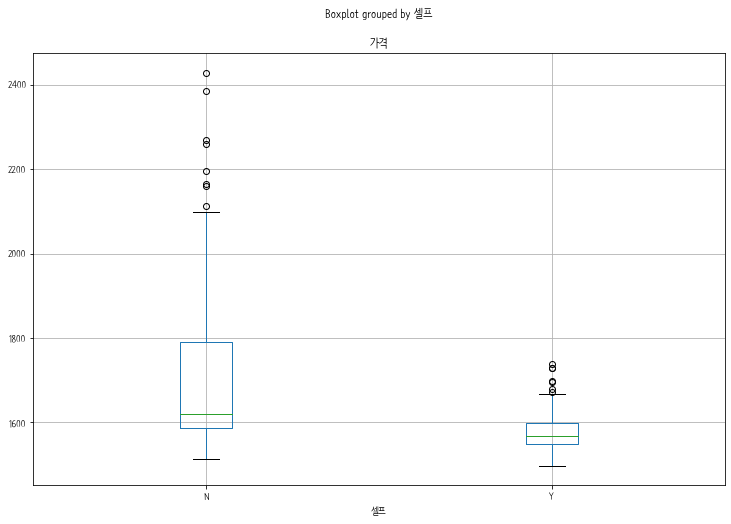

In [35]:
stations.boxplot(column='가격',by='셀프',figsize=(12,8))

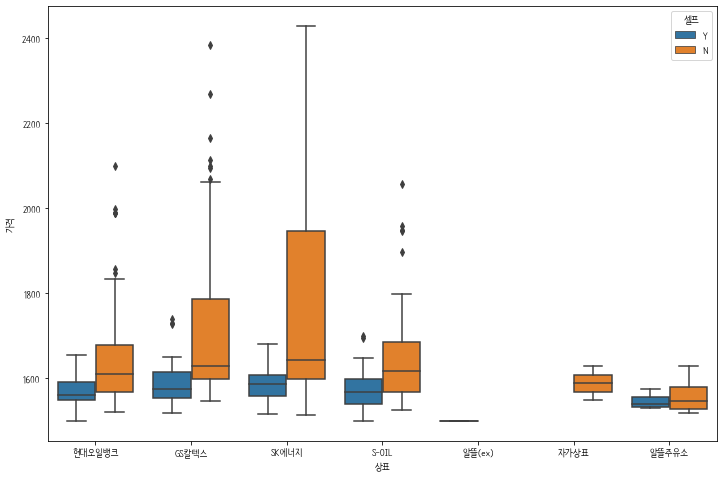

In [36]:
# 주유소 상표별로 확인
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격',hue='셀프',data=stations)
plt.show()

### 서울시 구별 휘발유 가격 확인

In [32]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [37]:
# 가격이 비싼 주유소 Top 5
stations.sort_values(by='가격',ascending=False).head(5)

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2428.0,N,SK에너지,중구
12,서계주유소,서울 용산구 청파로 367 (서계동),2384.0,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2269.0,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259.0,N,SK에너지,중구
36,뉴서울(강남),서울 강남구 언주로 716,2195.0,N,SK에너지,강남구


In [38]:
# 가격이 착한 주유소 Top 5
stations.sort_values(by='가격').head(5)

,상호,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1498.0,Y,알뜰(ex),서초구
0,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1499.0,Y,S-OIL,강북구
1,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1499.0,Y,현대오일뱅크,강북구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1514.0,N,SK에너지,양천구
1,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1515.0,Y,SK에너지,양천구


In [39]:
# 구별 주유소 가격 평균
gu_data = stations.groupby('구')[['가격']].mean()
gu_data

,가격
구,
강남구,1784.486486
강동구,1677.562500
강북구,1533.384615
강서구,1593.242424
관악구,1619.312500
광진구,1596.214286
구로구,1603.318182
금천구,1568.083333
노원구,1613.000000


In [41]:
geo_path = '../04.지도_공공API/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path,encoding='utf-8'))

In [42]:
map = folium.Map(
        location=[37.5502, 126.982], 
        zoom_start=11, tiles='Stamen Toner'
)

map.choropleth(
    geo_data = geo_data,
    data = gu_data.가격,
    columns = [gu_data.index, gu_data.가격],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)

map